# Other Visualization Techniques

In this section, we will introduce other data visualizations that can be used to represent categorical or numerical data. We will discuss another visualization library called `seaborn`. While the `matplotlib` library can be used to create most data visualizations in Python, there are some restrictions when it comes to customization. The `seaborn` library provides many flexible options when creating visualizations. In the upcoming exercises, we will use a combination of `seaborn` and `matplotlib` to make visualizations, including box and whisker plots, heatmaps, and area plots.

Along with the previous data and libraries we have been using, we will import `seaborn` as a common convention: `sns`.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('fast')


NorthAmerica_Military_USD_PercentGDP_Combined_csv = '''\
Year,CAN-PercentGDP,MEX-PercentGDP,USA-PercentGDP,CAN-USD,MEX-USD,USA-USD
1960,4.18525654,0.673508659,8.993124587,1.702442711,0.084,47.34655267
1961,4.128312243,0.651780326,9.1560315,1.677820881,0.0864,49.87977061
1962,3.999216389,0.689655172,9.331672945,1.671313753,0.0992,54.65094261
1963,3.620650112,0.718685832,8.831891186,1.610091701,0.112,54.56121578
1964,3.402062837,0.677506775,8.051281106,1.657457283,0.12,53.43232706
1965,2.930260659,0.591269841,7.587247177,1.57470454,0.1192,54.56179126
1966,2.683282422,0.576379066,8.435300286,1.614422827,0.1304,66.44275153
1967,2.74792677,0.545217107,9.417795933,1.775500366,0.1336,78.39844224
1968,2.54364188,0.548510764,9.268454275,1.797265817,0.1488,84.32903122
1969,2.27378467,0.600160043,8.633263795,1.770108751,0.18,84.99016543
1970,2.188979696,0.497411659,8.032743584,1.889157918,0.1768,83.407993
1971,2.131485639,0.48765558,6.943069609,2.077659711,0.1912,78.23797989
1972,2.011818438,0.536568089,6.519756924,2.233737031,0.2424,80.70807097
1973,1.832601818,0.544217687,5.893870591,2.363060955,0.3008,81.46979441
1974,1.783813085,0.565744137,5.954111197,2.809465529,0.4072,89.27892034
1975,1.863541853,0.57358422,5.622679096,3.18091549,0.5048,92.08092875
1976,1.765927978,0.598103574,5.191071429,3.581805735,0.531576968,94.71525108
1977,1.8057636,0.534256205,5.155617351,3.752174526,0.437692986,104.665219
1978,1.848887401,0.504834431,4.943087248,3.969158477,0.518287193,113.3820637
1979,1.711245918,0.505297474,4.951991535,4.084145738,0.679663588,126.8799271
1980,1.764448615,0.416107383,5.153537467,4.744402251,0.810422204,143.6883549
1981,1.709915638,0.513301014,5.646541256,5.141128191,1.284948561,176.5588753
1982,1.954343585,0.495419418,6.814057094,6.017321456,0.858130163,221.6735426
1983,2.081196249,0.522866314,6.32114426,6.947104072,0.778556797,223.427165
1984,2.117188855,0.65981906,6.23641653,7.349795764,1.155945373,245.1491683
1985,2.097376234,0.676313139,6.453219205,7.460563318,1.241863652,272.1632293
1986,2.109197118,0.634622463,6.626522658,7.78013674,0.817296612,295.5462238
1987,2.062576371,0.580341889,6.420274023,8.694447168,0.813391574,304.0866487
1988,1.986767119,0.536145374,6.071277702,9.897335684,0.981914646,309.6612693
1989,1.934614309,0.517255829,5.871206008,10.74713469,1.153375828,321.8665588
1990,1.958793742,0.433081035,5.605175294,11.41463185,1.210872502,325.129314
1991,1.895444339,0.435402301,4.883429398,11.3385033,1.459136041,299.3727791
1992,1.8616877,0.469454656,4.970466808,10.78880312,1.824550066,325.033736
1993,1.821753504,0.442785494,4.604350295,10.26882262,2.122980338,316.7194437
1994,1.696680257,0.518830327,4.215264675,9.57737764,2.635284079,308.084
1995,1.554090071,0.450891531,3.860245792,9.176903908,1.562615372,295.8530977
1996,1.403752581,0.476484778,3.554982206,8.615884471,1.882873103,287.9606687
1997,1.246243202,0.458095854,3.405562244,7.945140183,2.184061042,293.1678258
1998,1.256293902,0.450450487,3.201558499,7.748607984,2.263223453,290.9960551
1999,1.241703064,0.460988776,3.085676783,8.21077854,2.652912012,298.0948913
2000,1.11808088,0.44604782,3.112242147,8.299385231,3.031454509,320.0863242
2001,1.137368973,0.442657004,3.123809803,8.375571425,3.229469276,331.8056106
2002,1.120852292,0.421606002,3.447618099,8.495399281,3.172268734,378.4631388
2003,1.115878799,0.405916547,3.827161045,9.958245602,2.960496802,440.5320696
2004,1.107966027,0.364898723,4.016312736,11.33648983,2.854385965,492.9993762
2005,1.110669655,0.355958931,4.090034876,12.98813296,3.123454978,533.203
2006,1.125832408,0.311171936,4.041627237,14.8098928,3.035131019,558.335
2007,1.188901783,0.401163918,4.079655081,17.41713993,4.223037646,589.586
2008,1.248621382,0.390513227,4.463827356,19.3420584,4.334654124,656.756
2009,1.377555631,0.501556275,4.88559968,18.93622605,4.514233914,705.917
2010,1.194338338,0.452734493,4.922641677,19.31568883,4.789031339,738.005
2011,1.193291895,0.465777803,4.840173995,21.39372086,5.498458542,752.288
2012,1.118404598,0.475987281,4.477401219,20.45210711,5.717035575,725.205
2013,1.0023672,0.507919455,4.046678879,18.51573121,6.473144378,679.229
2014,0.989925299,0.513829957,3.69589465,17.85364048,6.758693845,647.789
2015,1.152709374,0.466676122,3.477845166,17.93764189,5.468837812,633.829639
2016,1.164161567,0.495064414,3.418942337,17.78277554,5.33687574,639.856443
2017,1.351602232,0.436510296,3.313381294,22.26969632,5.062076646,646.752927
2018,1.324681094,0.477517407,3.316248808,22.72932758,5.839521271,682.4914
2019,1.27894142,0.52348249,3.427080181,22.20440844,6.650808254,734.3441
2020,1.415055841,0.573651659,3.741160091,22.75484713,6.116376582,778.2322
'''

from io import StringIO

NorthAmerica_Military_USD_PercentGDP_Combined_file = StringIO(NorthAmerica_Military_USD_PercentGDP_Combined_csv)

military = pd.read_csv(NorthAmerica_Military_USD_PercentGDP_Combined_file, index_col='Year')

import warnings
warnings.filterwarnings('ignore')

## Box and Whisker Plots

Box and whisker plots are a useful data visualization method because they intrinsically display multiple summary statistics simultaneously. The central line of each box within a box and whisker plot is the *median*. The median (also known as the second quartile, $Q_2$) is a value within a dataset that lies within the middle, separating the higher half and the lower half of the dataset. The median is a valuable measure of center for a dataset because it is not greatly affected by outliers, as opposed to the *mean*.

If *A* represents a dataset with the values listed below, the median of *A* can be determined by sorting the numbers from low to high and determining the value that falls into the middle (which in this case is 109):

<img align="center" src="./img/median(odd).png" width="60%"/>


In the case of a dataset with an even number of values, the median can be calculated as the mean of the middle two values, as shown in the example dataset *B* below:

<img align="center" src="./img/median(even).png" width="45%"/>


Box and whisker plots also show the *lower quartile*, *the upper quartile*, the *interquartile range*, *outliers*, the *minimum*, and the *maximum*. The lower quartile $\left( Q_1\right)$ is the value where the lowest 25% of the data points within a dataset lie. It is represented by the lower end of the box. 

On the other side, the upper quartile $\left( Q_3\right)$ is the value in which the highest 25% of the dataset resides. It is represented by the higher end of a box.


The interquartile range (IQR), is the difference between the upper quartile and the lower quartile. The IQR is used to make the length of a box and is represented by the equation:

  > $IQR=Q_3-Q_1$
    

Outliers are data points that are less than $Q_1-1.5×IQR$ or greater than $Q_3+1.5×IQR$. These data points are shown beyond the extremity of the whiskers.

Lastly, the minimum and maximum values are represented by the lowest and highest values, respectively, <b>that are within the range $Q_1-1.5×IQR$ and $Q_3+1.5×IQR$</b>. Essentially, they are the lowest and highest values that <u>do not</u> qualify as outliers. The lower whisker represents the minimum value, while the upper whisker represents the maximum value.

Below is a pictorial summary of the major components of a box and whisker plot with an accompanying set of numbers, *A*:

<img align="center" src="./img/boxandwhisker.png" width="75%"/>

We will use a box and whisker plot to examine the percentage GDP spending on the military for each country in the '60s as a way to examine multiple statistics for each country in this time period.

First, we extract the data of interest:

In [2]:
the60s = military.loc[1960:1969, ['CAN-PercentGDP', 'MEX-PercentGDP', 'USA-PercentGDP']]

the60s

,CAN-PercentGDP,MEX-PercentGDP,USA-PercentGDP
Year,,,
1960,4.185257,0.673509,8.993125
1961,4.128312,0.651780,9.156031
1962,3.999216,0.689655,9.331673
1963,3.620650,0.718686,8.831891
1964,3.402063,0.677507,8.051281
1965,2.930261,0.591270,7.587247
1966,2.683282,0.576379,8.435300
1967,2.747927,0.545217,9.417796
1968,2.543642,0.548511,9.268454


It is possible to make boxplots using using `pyplot` or the dataframe method `plot.box()`, as shown below:

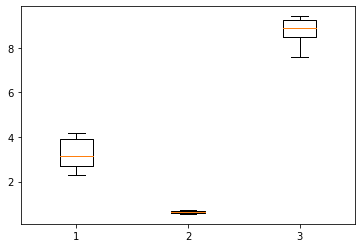

In [3]:
# Creates a boxplot using pyplot from matplotlib
plt.boxplot(the60s)
plt.show()

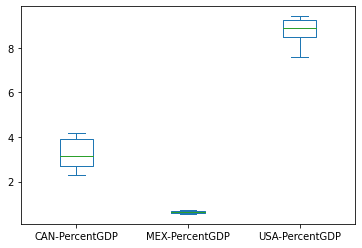

In [4]:
# Creates a boxplot using the dataframe method plot.box()
the60s.plot.box()
plt.show()

Plotting using these approaches, the graphs show data within the columns of interest, but depending on the approach used, we see that the column title may or may not be used as categorical indicators on the x-axis. Furthermore, while these plots do the job of displaying the median and interquartile range, adding individual data points will allow for viewers to more easily see the spread of the data. The addition of axis labels, a title, and some color would also enhance this plot and make it more aesthetically pleasing. 

We can accomplish this using a combination of functions from `matplotlib` and `seaborn`. Using the `sns.boxplot()` and `sns.swarmplot()` functions will allow us to create a boxplot with data points overlayed on top:

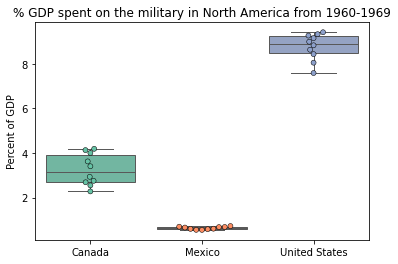

In [5]:
ax = sns.boxplot(data=the60s, palette="Set2", linewidth=1)
ax = sns.swarmplot(data=the60s, palette="Set2", linewidth=0.5, edgecolor = "black")
plt.xticks(ticks = [0,1,2], labels = ['Canada', 'Mexico', 'United States'])
plt.ylabel("Percent of GDP")
plt.title("% GDP spent on the military in North America from 1960-1969")


plt.show()

Now that we have proper labeling, we can see the median, upper quartile, and lower quartile of the percentage of the each country's GDP spent on the military from 1960 to 1969. A noticeable observation this plot shows is that Mexico not only spent a small percentage of their GDP on the military (less than 2%), but the percentage of spending during this decade had very little variability. This makes it hard to see what the median, upper quartile, and lower quartile are for Mexico. The issue of being able to visually resolve displays of data is a common one that data scientists encounter.

## Heatmaps

A heatmap is a matrix of data points depicted through a color gradient. Heatmaps are a great way to visualize data when you want to look at a multidimensional comparison of many variables. Heatmaps can be made from `matplotlib`, but this process may not be as straightforward to some. On the other hand, `seaborn` has a function dedicated to generations of heatmaps called `sns.heatmap()`. For your reference, both the `matplotlib` and `seaborn` approaches for constructing heatmaps are listed below.


We can use a heatmap to visualize variables that have a large number of values, such as the percentage of a country's GDP spent on the military from 1960 to 2020. Because Mexico has not spent over 1% of its GDP on the military in this time frame, we will look at these numbers for the U.S. and Canada. We will do this using the `seaborn` library.


To do this, we will first subset our data:

In [6]:
perc_gdp = military[['CAN-PercentGDP', 'USA-PercentGDP']]
perc_gdp

,CAN-PercentGDP,USA-PercentGDP
Year,,
1960,4.185257,8.993125
1961,4.128312,9.156031
1962,3.999216,9.331673
1963,3.620650,8.831891
1964,3.402063,8.051281
...,...,...
2016,1.164162,3.418942
2017,1.351602,3.313381
2018,1.324681,3.316249


Next, we will use the `sns.heatmap()` function to generate a heatmap for the subsetted data. We will use the dataframe `perc_gdp` as an argument for the `data` parameter. Other parameters such as `cmap`, `linewidth`, and `linecolor` allow for customization of heatmap. The `cbar_kws` parameter alters components of the color bar, and the `vmin` and `vmax` parameters set the minimum and maximum values of the colorbar, respectively.

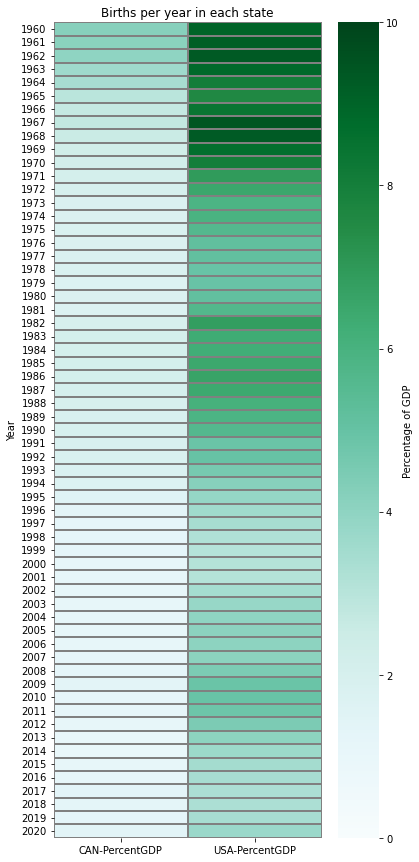

In [7]:
plt.figure(figsize=(6,15)) 

sns.heatmap(data = perc_gdp, cmap='BuGn', linewidth=2, linecolor="grey", # colormap, line width, and color specified,
           cbar_kws={'label': 'Percentage of GDP'}, vmin=0, vmax=10)  # color bar labeled, min and max values set
plt.title('Births per year in each state')                              # title added

plt.show()

Above, we see the matrix of values of the percentage of the GDP spent on the military in the U.S. and Canada from 1960 to 2020. Interestingly, Canada's percentage of the GDP going toward the military appeared to decrease steadily over the years.

## Area Plots

An area plot is a specialized line graph that can be used to show trends of multiple variables in a dataset over a period of time. In an area plot, data points over time are connected to create a trend line and the region formed under the line is filled with a solid color. A useful adaption of an area plot is that it can be constructed in a way that shows the a proportional relationship of each variable to all variables over time, which can be a great alternative to using multiple pie charts to examine temporal trends.

We will use an area plot to examine the proportion of USD spent between Canada and Mexico from 1960 to 2020. To do this, we will need to extract the data of interest and then calculate the proportion of money spent for each country. The following code takes the USD spent on the military for Canada and Mexico:

In [8]:
usd = military[['CAN-USD', 'MEX-USD']]
usd

,CAN-USD,MEX-USD
Year,,
1960,1.702443,0.084000
1961,1.677821,0.086400
1962,1.671314,0.099200
1963,1.610092,0.112000
1964,1.657457,0.120000
...,...,...
2016,17.782776,5.336876
2017,22.269696,5.062077
2018,22.729328,5.839521


Now that we have this data, we can begin to calculate the proportion of USD for each country. First, let's find the total between the two countries. We can do this by using the `apply()` method that we learned about in [Chapter 7](../7/1/Functions_to_DataFrames.ipynb). Because we want to find the total for each year, we need to apply the `np.sum()` function across columns (in other words, `axis=1`):

In [9]:
usd['Total'] = usd.apply(np.sum, axis=1)
usd['CAN-Prop'] = usd['CAN-USD']/usd['Total']
usd['MEX-Prop'] = usd['MEX-USD']/usd['Total']
usd

,CAN-USD,MEX-USD,Total,CAN-Prop,MEX-Prop
Year,,,,,
1960,1.702443,0.084000,1.786443,0.952979,0.047021
1961,1.677821,0.086400,1.764221,0.951027,0.048973
1962,1.671314,0.099200,1.770514,0.943971,0.056029
1963,1.610092,0.112000,1.722092,0.934963,0.065037
1964,1.657457,0.120000,1.777457,0.932488,0.067512
...,...,...,...,...,...
2016,17.782776,5.336876,23.119651,0.769163,0.230837
2017,22.269696,5.062077,27.331773,0.814792,0.185208
2018,22.729328,5.839521,28.568849,0.795598,0.204402


Now we can begin to make the area plot with the calculated proportions. To do these, we will use the `plt.stackplot()` function. This function first takes an array-like object for the x-values, followed by arrays of the y-values that are to be stacked. The `labels` parameter dictates how each y-value is to be labeled, which can be visualized in the legend using `plt.legend()`:

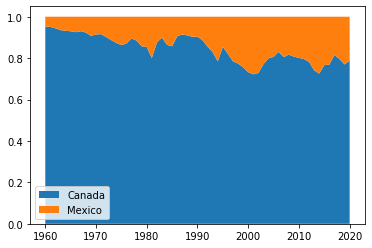

In [10]:
plt.stackplot(usd.index, usd['CAN-Prop'], usd['MEX-Prop'], labels=['Canada','Mexico'])
plt.legend(loc='lower left')
plt.show()

Now that we have made the plot, we can improve it by adding a descriptive title. As an aesthetic feature, we can also make this graph so that it takes up the entire plotting area by using `plt.margins`. This function accepts an x and y value, respectively, to indicate where the margins begin on each axis. To get rid of the margins, we will use 0 for each value. 

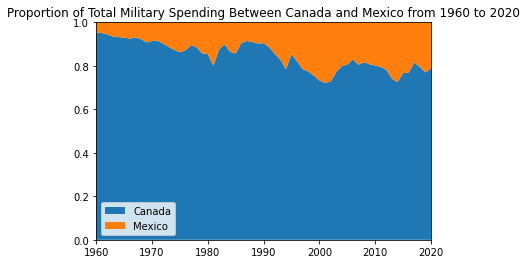

In [11]:
plt.stackplot(usd.index, usd['CAN-Prop'], usd['MEX-Prop'], labels=['Canada','Mexico'])
plt.legend(loc='lower left')
plt.margins(0,0)
plt.title('Proportion of Total Military Spending Between Canada and Mexico from 1960 to 2020')
plt.show()

We can now see the changes in the proportion of military spending between Canada and Mexico from 1960 to 2020. We see that the proportion of spending by Mexico increased over time.

## Conclusions

In this section, we were introduced to a new data visualization library: `seaborn`. The `seaborn` library can make many of the same visualizations available in `matplotlib` and can be used as an alternative in cases where more flexibility is needed. 

We learned how to make box and whisker plots and the multiiple statistics that these plots innately show. Box and whisker plots can be made in both `matplotlib` and `seaborn`, but using `seaborn` to construct these plots allows for an easy way to overlay data points upon the box and whisker plot.

We also learned about heatmaps and their ability to show multidimensional data.

Lastly, we learned how to construct area plots as another way to show proportional trends overtime, combining benefits of both a line graph and pie chart.

Documentation to functions introduced in this section can be found below:


- <a target="_blank" href="https://seaborn.pydata.org/generated/seaborn.boxplot.html">Seaborn documentaion and user guide</a>
- <a target="_blank" href="https://seaborn.pydata.org/examples/index.html">Seaborn data visualization gallery</a>
- <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.box.html">DataFrame.plot.box( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html">plt.boxplot( )</a>
- <a target="_blank" href="https://seaborn.pydata.org/generated/seaborn.boxplot.html">sns.boxplot( )</a>
- <a target="_blank" href="https://seaborn.pydata.org/generated/seaborn.swarmplot.html">sns.swarmplot( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html">Heatmaps in Matplotlib</a>
- <a target="_blank" href="https://seaborn.pydata.org/examples/spreadsheet_heatmap.html">sns.heatmap( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stackplot.html">plt.stackplot( )</a>
